# <font color = #FF0000>**Model Preparation**</font>

## <font color = #0e46a1>**Data Acquisition**</font>

#### <font color = #696969>**Import Libraries**</font>

In [1]:
import numpy   as np
import pandas  as pd

In [2]:
import json

#### <font color = #696969>**Import the Data**</font>

In [3]:
with open('Sample Data.json', 'r') as f:
    SData_json = json.load(f)
SData = pd.read_json(SData_json)

In [4]:
XData = SData.copy().drop(['is_fraud'], axis = 1)

In [5]:
YData = SData['is_fraud'].copy()

## <font color = #0e46a1>**Split into Training and Test Sets**</font>

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
XTrain, XTest, YTrain, YTest = train_test_split(XData, YData, test_size = 0.3, random_state = 2023, stratify = YData)

In [8]:
import tensorflow as tf

In [9]:
from tensorflow  import keras

In [10]:
def Perceptron():

  Classifier = keras.models.Sequential()

  Classifier.add(keras.layers.Dense(units = 64, activation = 'relu',    kernel_initializer = 'uniform', input_dim = 51))
  Classifier.add(keras.layers.Dropout(0.10))
  Classifier.add(keras.layers.Dense(units = 32, activation = 'relu',    kernel_initializer = 'uniform'))
  Classifier.add(keras.layers.Dropout(0.10))
  Classifier.add(keras.layers.Dense(units = 16, activation = 'relu',    kernel_initializer = 'uniform'))
  Classifier.add(keras.layers.Dropout(0.10))
  Classifier.add(keras.layers.Dense(units = 1,  activation = 'sigmoid', kernel_initializer = 'uniform'))

  Classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

  return Classifier

In [11]:
Classifier = Perceptron()

#### <font color = #696969>**Train the model**</font>

In [12]:
XTrain, XValid, YTrain, YValid =  train_test_split(XTrain, YTrain, test_size = 0.1, random_state = 2023)

In [13]:
history = Classifier.fit(XTrain, YTrain, epochs = 50, batch_size = 32, shuffle = True, validation_data = (XValid, YValid), verbose = 1)

Epoch 1/50
296/296 [==============================] - 2s 3ms/step - loss: 0.1556 - accuracy: 0.8098 - val_loss: 0.1106 - val_accuracy: 0.8506
Epoch 2/50
296/296 [==============================] - 1s 2ms/step - loss: 0.0939 - accuracy: 0.8605 - val_loss: 0.0818 - val_accuracy: 0.8563
Epoch 3/50
296/296 [==============================] - 1s 2ms/step - loss: 0.0710 - accuracy: 0.9045 - val_loss: 0.0653 - val_accuracy: 0.9153
Epoch 4/50
296/296 [==============================] - 1s 2ms/step - loss: 0.0602 - accuracy: 0.9209 - val_loss: 0.0575 - val_accuracy: 0.9229
Epoch 5/50
296/296 [==============================] - 1s 2ms/step - loss: 0.0548 - accuracy: 0.9276 - val_loss: 0.0568 - val_accuracy: 0.9163
Epoch 6/50
296/296 [==============================] - 1s 2ms/step - loss: 0.0514 - accuracy: 0.9321 - val_loss: 0.0561 - val_accuracy: 0.9153
Epoch 7/50
296/296 [==============================] - 1s 2ms/step - loss: 0.0498 - accuracy: 0.9345 - val_loss: 0.0538 - val_accuracy: 0.9239
Epoch 

#### <font color = #696969>**Check Overfitting**</font>

In [14]:
import matplotlib.pyplot as plt

In [15]:
def History(Neuronal, history):
    
    Palette = ["#8C8C91","#018A33"]
    
    plt.gca().set_prop_cycle(color = Palette)
    
    plt.plot(Neuronal.history.history['loss'])
    plt.plot(Neuronal.history.history['val_loss'])
    
    plt.xlim(0,50)
    
    plt.title("Función de Pérdida en el modelo a través de los Epochs")
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
        
    plt.legend(['Entrenamiento', 'Validación'], loc = 'upper right')
    plt.grid(True)
    plt.show()
    
    plt.gca().set_prop_cycle(color = Palette)
    
    plt.plot(Neuronal.history.history['accuracy'])
    plt.plot(Neuronal.history.history['val_accuracy'])
    
    plt.xlim(0,50)
    
#   plt.title("Model's Training & Validation Accuracy across epochs")
    plt.title("Exactitud del modelo a través de los Epochs")
    
    plt.xlabel('Epochs')
    plt.ylabel('Exactitud')
    
    plt.legend(['Entrenamiento', 'Validación'], loc = 'lower right')
    plt.grid(True)
    plt.show()

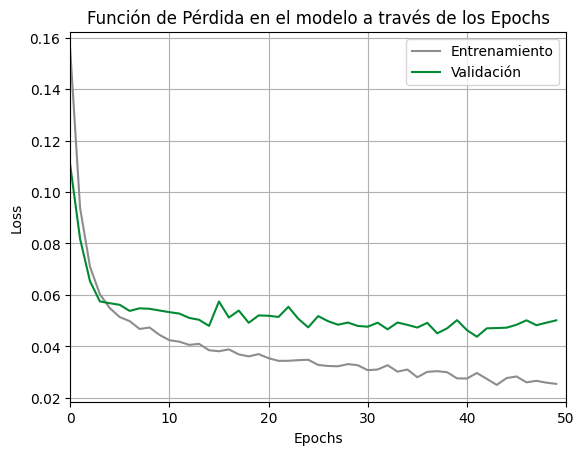

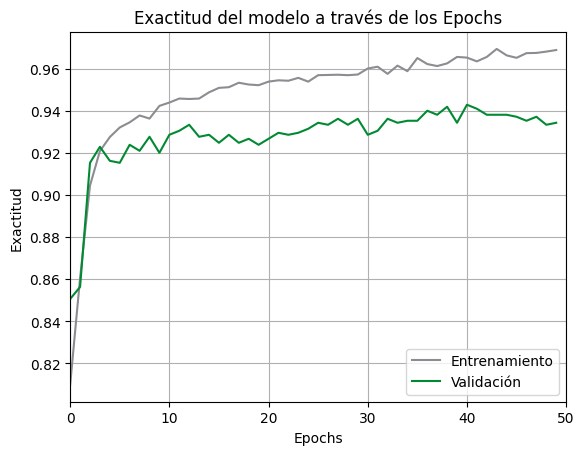

In [16]:
H = History(Classifier, history)

In [17]:
Prediction = pd.DataFrame(data = [], index = YTrain.index, columns = [0,1])

In [18]:
Prediction.loc[XTrain.index, :] = Classifier.predict(XTrain)

296/296 [==============================] - 1s 2ms/step


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [20]:
def Scores(YTrain, Prediction):
    
    YPrediction = (Prediction >= 0.23642015034152006).astype(int)

    A = accuracy_score(YTrain, YPrediction)*100
    P = precision_score(YTrain, YPrediction)*100
    R = recall_score(YTrain, YPrediction)*100
    F = f1_score(YTrain, YPrediction)*100
    
    A_Porcent = "{:.2f}%".format(A)
    P_Porcent = "{:.2f}%".format(P)
    R_Porcent = "{:.2f}%".format(R)
    F_Porcent = "{:.2f}%".format(F)
    
    print(' Accuracy: ',A_Porcent)
    print('Precision: ',P_Porcent)
    print('   Recall: ',R_Porcent)
    print('       F1: ',F_Porcent)

In [21]:
Scores = Scores(YTrain, Prediction.loc[:,1])

 Accuracy:  96.83%
Precision:  94.85%
   Recall:  99.00%
       F1:  96.88%


In [22]:
import matplotlib.pyplot as plt

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
import seaborn as sns

In [25]:
YPrediction = (Prediction.loc[:,1] >= 0.23642015034152006).astype(int)

In [26]:
CM = confusion_matrix(YTrain, YPrediction)

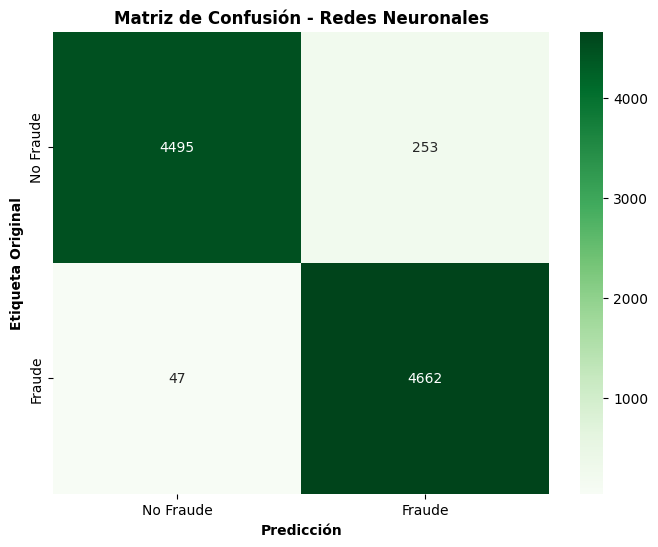

In [27]:
labels = ['No Fraude','Fraude']

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot = True, fmt="d", cmap = "Greens", xticklabels = labels, yticklabels = labels)

plt.xticks(fontweight='light')
plt.yticks(fontweight='light')

plt.xlabel('Predicción', fontweight='bold')
plt.ylabel('Etiqueta Original', fontweight='bold')

plt.title('Matriz de Confusión - Redes Neuronales', fontweight = 'bold')

plt.savefig('Heatmap - RN - Entrenamiento.png')

plt.show()

In [28]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [29]:
def Curves(YTrain, AnomalyScores, returnPredictions = False):

    Predictions = pd.concat([YTrain, AnomalyScores], axis = 1)
    Predictions.columns = ['True', 'Prediction: AnomalyScores']

    Precision, Recall, Thresholds = precision_recall_curve(Predictions['True'], Predictions['Prediction: AnomalyScores'])

    Average_Precision = average_precision_score(Predictions['True'],Predictions['Prediction: AnomalyScores'])

    plt.step(Recall, Precision, color = 'green', alpha = 0.7, where = 'post')

    plt.fill_between(Recall, Precision, step = 'post', alpha = 0.3, color = 'green')

    plt.xlabel('Sensibilidad ')
    plt.ylabel('Precisión ')

    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.title('Curva de Precisión-Sensibilidad: Precisión Promedio = {0:0.2f}'.format(Average_Precision), fontweight = 'bold')
    
    plt.savefig('ROC - RN - Entrenamiento.png')

    plt.show()

    fpr, tpr, thresholds = roc_curve(Predictions['True'], Predictions['Prediction: AnomalyScores'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color = 'green', lw = 2, label = 'Curva ROC')
    plt.plot([0, 1], [0, 1], color = 'k', lw = 2, linestyle = '--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('Proporción Falsos Positivos')
    plt.ylabel('Proporción Verdaderos Positivos')

    #plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC), fontweight = 'bold')
    plt.title('Área bajo la Curva = {0:0.2f}'.format(areaUnderROC), fontweight = 'bold')
    plt.legend(loc = "lower right")
    
    plt.savefig('AUC - RN - Entrenamiento.png')
    
    plt.show()

    if returnPredictions == True:
        return Predictions

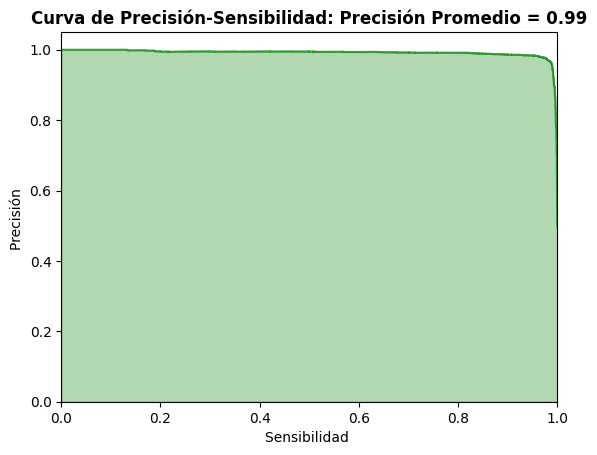

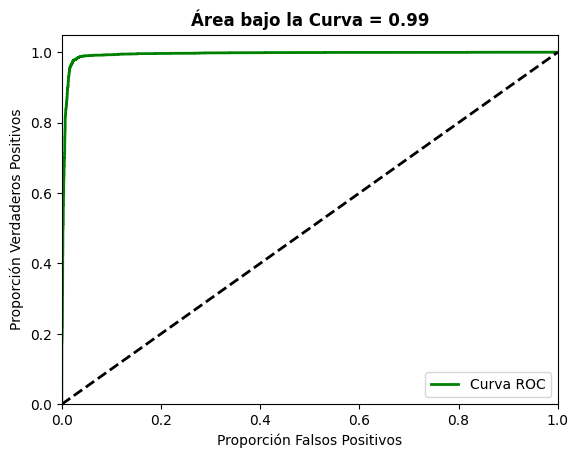

In [30]:
Curves = Curves(YTrain, Prediction.loc[:,1], True)

## <font color = #0e46a1>**Model Performance**</font>

#### <font color = #696969>**Test the model**</font>

In [31]:
Predictions = Classifier.predict(XTest, verbose = 1)

141/141 [==============================] - 0s 1ms/step


In [32]:
def AnomalyScores(Training, Reduced):
    
    Loss = np.sum((np.array(Training) - np.array(Reduced))**2, axis = 1)
    Loss = pd.Series(data = Loss,index = Training.index)
    Loss = (Loss - np.min(Loss))/(np.max(Loss) - np.min(Loss))
    
    return Loss

In [33]:
Anomaly = AnomalyScores(XTest, Predictions)

In [34]:
Evaluation = Classifier.evaluate(XTest, YTest)

141/141 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9436


In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [36]:
def Score(YTrain, Prediction):
    
    YPrediction = (Prediction >= 0.23642015034152006).astype(int)

    A = accuracy_score(YTrain, YPrediction)*100
    P = precision_score(YTrain, YPrediction)*100
    R = recall_score(YTrain, YPrediction)*100
    F = f1_score(YTrain, YPrediction)*100
    
    A_Porcent = "{:.2f}%".format(A)
    P_Porcent = "{:.2f}%".format(P)
    R_Porcent = "{:.2f}%".format(R)
    F_Porcent = "{:.2f}%".format(F)
    
    print(' Accuracy: ',A_Porcent)
    print('Precision: ',P_Porcent)
    print('   Recall: ',R_Porcent)
    print('       F1: ',F_Porcent)

In [37]:
Values = Score(YTest, Predictions)

 Accuracy:  94.14%
Precision:  91.38%
   Recall:  97.47%
       F1:  94.33%


In [38]:
YPrediction = (Predictions >= 0.23642015034152006).astype(int)

In [39]:
CM = confusion_matrix(YTest, YPrediction)

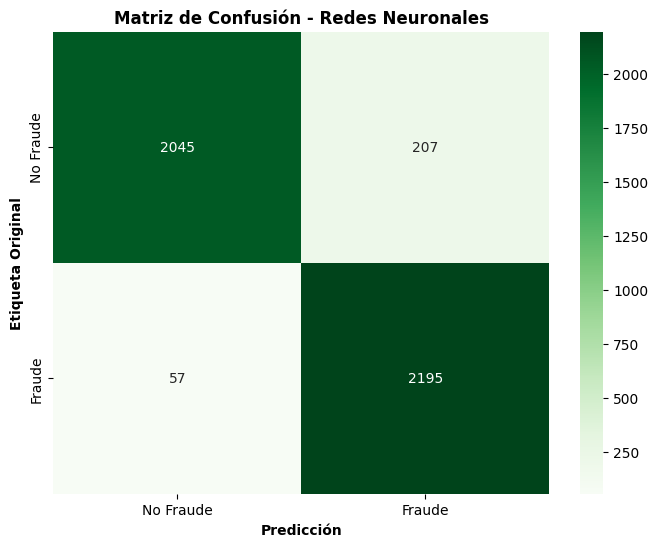

In [40]:
labels = ['No Fraude','Fraude']

plt.figure(figsize = (8, 6))
sns.heatmap(CM, annot = True, fmt="d", cmap = "Greens", xticklabels = labels, yticklabels = labels)

plt.xticks(fontweight ='light')
plt.yticks(fontweight ='light')

plt.xlabel('Predicción', fontweight = 'bold')
plt.ylabel('Etiqueta Original', fontweight = 'bold')

plt.title('Matriz de Confusión - Redes Neuronales', fontweight = 'bold')

plt.savefig('Heatmap - RN - Prueba.png')

plt.show()

#### <font color = #696969>**Precision-Recall Curve**</font>

In [41]:
def Curve(YTrain, AnomalyScores, returnPredictions = False):

    Predictions = pd.concat([YTrain, AnomalyScores], axis = 1)
    Predictions.columns = ['True', 'Prediction: AnomalyScores']

    Precision, Recall, Thresholds = precision_recall_curve(Predictions['True'], Predictions['Prediction: AnomalyScores'])

    Average_Precision = average_precision_score(Predictions['True'],Predictions['Prediction: AnomalyScores'])

    plt.step(Recall, Precision, color = 'green', alpha = 0.7, where = 'post')

    plt.fill_between(Recall, Precision, step = 'post', alpha = 0.3, color = 'green')

    plt.xlabel('Sensibilidad ')
    plt.ylabel('Precisión ')

    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.title('Curva de Precisión-Sensibilidad: Precisión Promedio = {0:0.2f}'.format(Average_Precision), fontweight = 'bold')
    
    plt.savefig('ROC - RN - Prueba.png')

    plt.show()

    fpr, tpr, thresholds = roc_curve(Predictions['True'], Predictions['Prediction: AnomalyScores'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color = 'green', lw = 2, label = 'Curva ROC')
    plt.plot([0, 1], [0, 1], color = 'k', lw = 2, linestyle = '--')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('Proporción Falsos Positivos')
    plt.ylabel('Proporción Verdaderos Positivos')

    #plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC), fontweight = 'bold')
    plt.title('Área bajo la Curva = {0:0.2f}'.format(areaUnderROC), fontweight = 'bold')
    plt.legend(loc = "lower right")
    
    plt.savefig('AUC - RN - Prueba.png')
    
    plt.show()

    if returnPredictions == True:
        return Predictions

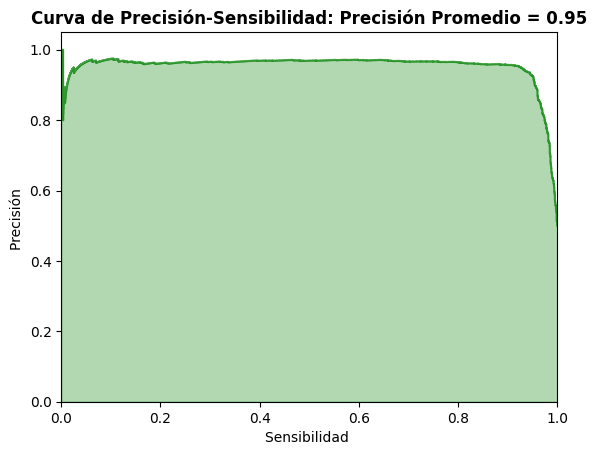

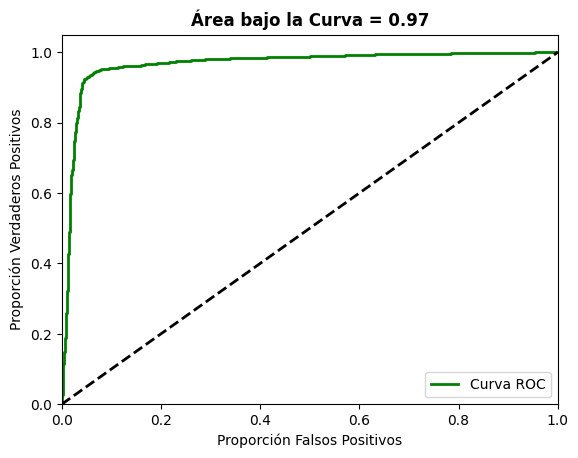

In [42]:
Curves = Curve(YTest, Anomaly, True)